In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('House_prediction.csv')#read data

In [3]:
df.head()#peak at data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
df.isnull().mean()

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64

In [10]:
X=[cols for cols in df.columns if df[cols].isnull().sum().mean()>0]

In [11]:
X

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [12]:
df[X].isnull().mean()

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [13]:
new_cols=[col for col in df.columns if df[col].isnull().mean()<.05]

In [14]:
df_new=df[new_cols].dropna()#drop columns wuth mean less than 0.05

In [15]:
df_new

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [16]:
df_new.isnull().values.any()

False

In [17]:
label_cols=[col for col in df_new.columns if df_new[col].dtype=='O']#categorical columns

In [18]:
label_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [19]:
for col in label_cols:
    label_sort=df_new.groupby([col])['SalePrice'].mean().sort_values().index
    label_sort={k:i for i,k in enumerate(label_sort,0)}
    df_new[col]=df_new[col].map(label_sort)

In [20]:
df_new.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,8450,1,0,1,1,0,0,...,0,0,0,0,0,2,2008,4,3,208500
1,2,20,3,9600,1,0,1,1,1,0,...,0,0,0,0,0,5,2007,4,3,181500
2,3,60,3,11250,1,1,1,1,0,0,...,0,0,0,0,0,9,2008,4,3,223500
3,4,70,3,9550,1,1,1,1,2,0,...,272,0,0,0,0,2,2006,4,1,140000
4,5,60,3,14260,1,1,1,1,1,0,...,0,0,0,0,0,12,2008,4,3,250000


In [21]:
df_new.dtypes

Id               int64
MSSubClass       int64
MSZoning         int64
LotArea          int64
Street           int64
                 ...  
MoSold           int64
YrSold           int64
SaleType         int64
SaleCondition    int64
SalePrice        int64
Length: 70, dtype: object

In [22]:
df_new.describe()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,...,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000
mean,729.773371,56.851983,2.708924,10536.987252,0.995751,0.436261,1.051700,0.999292,0.661473,0.063739,...,22.019122,3.398017,15.572946,2.852691,41.284703,6.323654,2007.809490,4.288244,3.016289,182507.021955
std,422.443710,42.309163,0.800145,10113.840927,0.065071,0.656032,0.454309,0.026612,1.173830,0.279545,...,61.192453,29.432240,56.627468,40.851699,494.856654,2.707981,1.327289,1.192846,0.817346,79270.416057
min,1.000000,20.000000,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,364.750000,20.000000,3.000000,7572.750000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,4.000000,3.000000,131475.000000
50%,727.500000,50.000000,3.000000,9500.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,4.000000,3.000000,164600.000000
75%,1098.250000,70.000000,3.000000,11618.250000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,4.000000,3.000000,215000.000000
max,1460.000000,190.000000,4.000000,215245.000000,1.000000,3.000000,3.000000,1.000000,4.000000,2.000000,...,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,755000.000000


In [23]:
df_new_cor=df_new.corr()#correlation between attributes
df_new_cor

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.010816,0.030727,-0.034357,0.008937,-0.039166,0.001856,-0.013568,-0.042570,0.007534,...,0.005246,-0.042122,0.001825,0.058016,-0.003443,0.026508,-0.004209,-0.029598,-0.020002,-0.024651
MSSubClass,0.010816,1.000000,-0.212674,-0.138298,-0.025456,-0.102411,-0.023236,0.023196,-0.064356,-0.023770,...,-0.016768,-0.041226,-0.026202,0.008496,-0.022705,-0.016463,-0.026526,-0.047026,-0.039607,-0.082281
MSZoning,0.030727,-0.212674,1.000000,0.142648,0.085122,0.190779,0.047276,-0.009688,0.078374,0.006961,...,-0.232406,0.032820,0.026395,0.025421,0.011251,-0.003264,0.012479,0.171132,0.147049,0.332432
LotArea,-0.034357,-0.138298,0.142648,1.000000,-0.197712,0.306147,0.185120,-0.010106,0.173503,0.441453,...,-0.022978,0.021153,0.042818,0.077814,0.041567,0.001070,-0.012886,0.023321,0.037653,0.264803
Street,0.008937,-0.025456,0.085122,-0.197712,1.000000,-0.022951,-0.016537,-0.001739,-0.000289,-0.179906,...,0.023515,0.007545,-0.032613,0.004563,-0.023468,0.003788,-0.025791,0.043183,-0.012023,0.043129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,0.026508,-0.016463,-0.003264,0.001070,0.003788,0.028176,0.090082,0.052355,-0.012105,0.012050,...,-0.025472,0.030750,0.023423,-0.034298,-0.009433,1.000000,-0.148464,0.077729,0.043725,0.041754
YrSold,-0.004209,-0.026526,0.012479,-0.012886,-0.025791,-0.021688,-0.015388,-0.023887,0.005430,0.000279,...,-0.008192,0.022425,0.012193,-0.060408,-0.000730,-0.148464,1.000000,-0.120173,-0.047440,-0.023361
SaleType,-0.029598,-0.047026,0.171132,0.023321,0.043183,0.041155,0.079720,0.028761,-0.026431,-0.048760,...,-0.110762,0.020046,-0.018615,0.011038,-0.022311,0.077729,-0.120173,1.000000,0.738086,0.365147
SaleCondition,-0.020002,-0.039607,0.147049,0.037653,-0.012023,0.044894,0.079800,0.065696,-0.051866,-0.044871,...,-0.125099,0.012546,-0.026171,-0.010647,-0.005144,0.043725,-0.047440,0.738086,1.000000,0.330172


<AxesSubplot:>

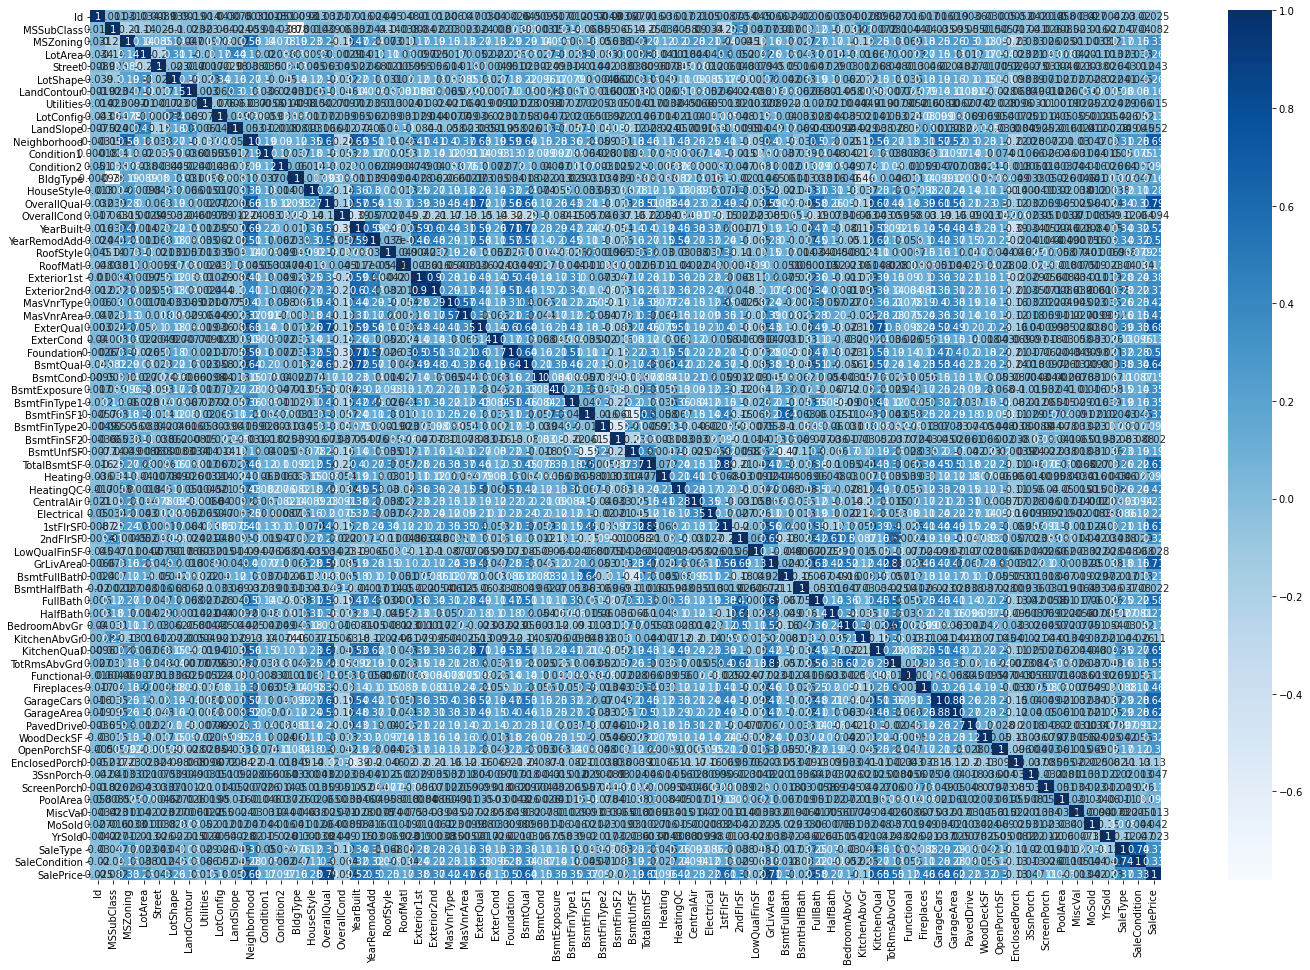

In [24]:
plt.figure(figsize=(24,16))
sns.heatmap(df_new_cor,cmap='Blues',annot=True)

In [25]:
corr_cols=[col for col in df_new_corr.columns if df_new_corr[SalesPrice] =>'0.5']

SyntaxError: invalid syntax (<ipython-input-25-97c6f38e8823>, line 1)

In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_std=sc.fit_transform(df_new)
x_std=pd.DataFrame(x_std,columns=df_new.columns)#normalize data

In [27]:
x_std.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,-1.725748,0.074431,0.363909,-0.206423,0.065326,-0.665235,-0.113839,0.026622,-0.563717,-0.228092,...,-0.359961,-0.115493,-0.275104,-0.069855,-0.083457,-1.597200,0.143584,-0.241729,-0.019936,0.328019
1,-1.723380,-0.871325,0.363909,-0.092677,0.065326,-0.665235,-0.113839,0.026622,0.288497,-0.228092,...,-0.359961,-0.115493,-0.275104,-0.069855,-0.083457,-0.488971,-0.610098,-0.241729,-0.019936,-0.012708
2,-1.721012,0.074431,0.363909,0.070524,0.065326,0.859621,-0.113839,0.026622,-0.563717,-0.228092,...,-0.359961,-0.115493,-0.275104,-0.069855,-0.083457,0.988668,0.143584,-0.241729,-0.019936,0.517312
3,-1.718644,0.310871,0.363909,-0.097622,0.065326,0.859621,-0.113839,0.026622,1.140711,-0.228092,...,4.086606,-0.115493,-0.275104,-0.069855,-0.083457,-1.597200,-1.363781,-0.241729,-2.467747,-0.536418
4,-1.716276,0.074431,0.363909,0.368241,0.065326,0.859621,-0.113839,0.026622,0.288497,-0.228092,...,-0.359961,-0.115493,-0.275104,-0.069855,-0.083457,2.096897,0.143584,-0.241729,-0.019936,0.851729


In [28]:
x_std.shape

(1412, 70)

In [29]:
x=x_std.iloc[:,1:]
x.shape

(1412, 69)

In [30]:
y=x_std.SalePrice
y.shape

(1412,)

In [31]:
y=y.values.reshape(-1,1)
y.shape

(1412, 1)

In [32]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=47)#split data

In [34]:
x_train.shape,x_test.shape

((988, 69), (424, 69))

In [35]:
y_train.shape,y_test.shape

((988, 1), (424, 1))

In [36]:
lm = LinearRegression()

In [37]:
lm.fit(x_train,y_train)

LinearRegression()

In [38]:
y_pred = lm.predict(x_test)
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
rmse

0.0034168897322576575

In [39]:
print('Predicted SalesPrice:',y_pred)
print('actual SalesPrice',y_test)

Predicted SalesPrice: [[-1.17370362]
 [ 0.14503582]
 [-1.51590704]
 [-0.87714499]
 [-0.4985595 ]
 [ 0.68767502]
 [ 0.34694808]
 [-0.48593999]
 [-0.075995  ]
 [-1.01595966]
 [-0.67523273]
 [ 0.5993384 ]
 [-0.70047176]
 [-0.75725958]
 [-0.72571079]
 [-0.91500353]
 [-0.47332047]
 [-0.34712531]
 [ 0.91482631]
 [ 0.0125309 ]
 [ 1.39533962]
 [ 0.03146018]
 [ 7.09838922]
 [ 1.9243876 ]
 [ 0.18289437]
 [-0.06949595]
 [ 1.79819244]
 [-0.91500353]
 [-0.41022289]
 [-0.43546192]
 [-0.8897645 ]
 [-0.09473498]
 [-0.94024257]
 [ 1.35650937]
 [-0.34712531]
 [-0.67649468]
 [-0.82666692]
 [-0.11072391]
 [ 0.69398477]
 [-0.33450579]
 [-0.90869378]
 [-0.66261321]
 [-1.34406708]
 [-0.54903757]
 [-0.94024257]
 [-0.57547545]
 [-0.13259353]
 [-0.34712531]
 [-0.78880837]
 [-0.44177168]
 [ 0.08193824]
 [ 0.50469203]
 [-0.05182863]
 [-0.85190595]
 [-0.38498386]
 [-0.99576844]
 [-0.07666384]
 [ 1.67199728]
 [ 0.61826768]
 [-0.48593999]
 [-0.08211547]
 [ 0.68136526]
 [-0.44808144]
 [ 1.48018063]
 [ 0.03776993]
 [-

In [40]:
lm.score(x_test, y_test)

0.9999879016039823

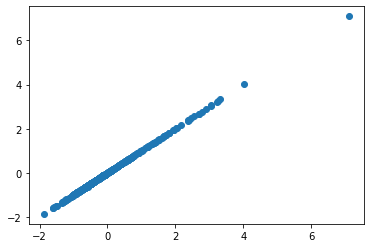

In [41]:
plt.scatter(y_test,y_pred)#visualize prrediction

In [42]:
from sklearn.tree import DecisionTreeRegressor

DTR= DecisionTreeRegressor(random_state = 49, max_depth = 10)

In [43]:
DTR.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10, random_state=49)

In [44]:
y_pred_DTR=DTR.predict(x_test)

In [45]:
mse_DTR = mean_squared_error(y_test, y_pred_DTR)
rmse_DTR = np.sqrt(mse_DTR)
rmse_DTR

0.08681727380888464

In [46]:
DTR.score(x_test, y_test)

0.9921895122216087

In [47]:
print('Predicted SalesPrice:',y_pred_DTR)
print('actual SalesPrice',y_test)

Predicted SalesPrice: [-1.1738866   0.14452683 -1.54597934 -0.87714499 -0.4985595   0.6750555
  0.33306661 -0.48562029 -0.07580571 -1.01595966 -0.67523273  0.5993384
 -0.70047176 -0.75094982 -0.72571079 -0.91500353 -0.47332047 -0.34712531
  0.92113607  0.00622114  1.40698744  0.03146018  5.58404728  1.9243876
  0.17658461 -0.06949595  1.80197829 -0.91500353 -0.41106419 -0.42915216
 -0.8897645  -0.09473498 -0.94024257  1.40698744 -0.34838726 -0.67523273
 -0.82666692 -0.10861645  0.71291405 -0.33450579 -0.89922914 -0.66311799
 -1.38192563 -0.54903757 -0.94024257 -0.5742766  -0.13890329 -0.34838726
 -0.78906076 -0.44808144  0.08193824  0.50469203 -0.04551887 -0.85190595
 -0.39255557 -0.99072063 -0.07580571  1.67081735  0.63214915 -0.48562029
 -0.08211547  0.6750555  -0.44808144  1.54580212  0.04155579 -0.47963023
  1.50163381 -1.00616692  2.39761946 -0.47332047 -0.53641805 -0.01901789
  2.65000978 -0.52379853 -0.70047176 -0.91500353  2.7825147  -0.46701071
  0.09455776 -0.50486926 -0.0884

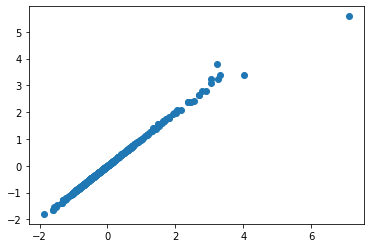

In [48]:
plt.scatter(y_test,y_pred_DTR)

In [49]:
from sklearn.linear_model import Lasso, Ridge #regularisation

In [50]:
ls=Lasso(alpha=0.01)
#ls=lasso(alpha=1.0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.9999029307390569

In [51]:
ls.coef_

array([-0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.99014763])

In [52]:
#default value of alpha=1.0
#alpha=.01
rd=Ridge(alpha=0.01)
#rd=Ridge()
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.999999999346124

In [53]:
rd.coef_

array([[-8.08594785e-06, -6.71895988e-07,  1.71359826e-06,
         7.06519825e-07, -1.36246697e-07,  2.97488356e-06,
         1.84892191e-29,  1.38568643e-06, -7.39838178e-07,
         1.11837930e-05,  4.25359188e-07, -2.43848733e-06,
        -4.26248930e-06, -1.18648024e-06,  1.11953320e-05,
         3.52656708e-06, -1.74617515e-06, -1.25236089e-06,
         2.21917334e-06,  5.01737521e-06,  4.44378652e-06,
        -3.03426582e-06, -1.39976242e-06,  6.02199963e-06,
         5.34970182e-06, -2.97753050e-07,  1.37499435e-06,
         4.47630747e-06, -3.22627586e-07,  4.47616955e-06,
        -2.57551642e-08,  1.94128923e-06,  7.73844590e-07,
        -1.23164763e-07, -2.00836218e-06, -3.68633709e-08,
         4.74647925e-07,  7.02499006e-07, -3.08780228e-07,
        -1.57052731e-06,  5.39539255e-06,  5.25959084e-06,
         2.32226380e-07,  8.33748653e-06,  2.14701005e-06,
         9.83512413e-08,  1.80825858e-06, -5.87720590e-08,
        -1.45868634e-06, -3.48530042e-06,  5.81491704e-0

In [54]:
#ElasticNet is a combination of both lasso and Ridge
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.01)
enr=ElasticNet()
enr.fit(x_train,y_train)
enr.score(x_train,y_train)

0.5751515082017308

# DEEP LEARNING MODELS

In [55]:
import tensorflow as tf

In [56]:
from tensorflow import keras

In [57]:
from tensorflow.keras.models import Sequential

In [58]:
t_model=Sequential()

In [59]:
from tensorflow.keras.layers import Dense

In [60]:
t_model.add(Dense(units=32,activation='relu'))
t_model.add(Dense(units=10,activation='softmax'))

In [61]:
t_model.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy']
                )

In [62]:
t_model.compile(loss=tf.keras.losses.categorical_crossentropy,
             optimizer=tf.keras.optimizers.SGD(learning_rate=0.01))

In [63]:
x_train =np.array(x_train)
y_train = np.array(y_train)

In [64]:
t_model.fit(x_train,y_train,epochs=5, batch_size=32 )

Train on 988 samples
Epoch 1/5
988/988 [==============================] - 0s 229us/sample - loss: -0.6578
Epoch 2/5
988/988 [==============================] - 0s 34us/sample - loss: -1.3817
Epoch 3/5
988/988 [==============================] - 0s 31us/sample - loss: 264.7736
Epoch 4/5
988/988 [==============================] - 0s 30us/sample - loss: 13580.1809
Epoch 5/5
988/988 [==============================] - 0s 30us/sample - loss: 418936.7737


In [65]:
loss_and_metrics = t_model.evaluate(x_test, y_test, batch_size=128)

424/424 [==============================] - 0s 151us/sample - loss: 1735256.6958


In [66]:
classes = t_model.predict(x_test, batch_size=128)

In [67]:
classes#prediction

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [68]:
import keras.callbacks
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [69]:
history = t_model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=100, batch_size=32)

Train on 988 samples, validate on 424 samples
Epoch 1/100
988/988 [==============================] - 0s 54us/sample - loss: 15813614.4049 - val_loss: 71716987.9410
Epoch 2/100
988/988 [==============================] - 0s 51us/sample - loss: 596485390.3482 - val_loss: 1895458580.2264
Epoch 3/100
988/988 [==============================] - 0s 47us/sample - loss: 20865191181.4737 - val_loss: 64599514425.9623
Epoch 4/100
988/988 [==============================] - 0s 44us/sample - loss: 753953333679.1578 - val_loss: 3004591401926.0376
Epoch 5/100
988/988 [==============================] - 0s 52us/sample - loss: 26388345008045.0859 - val_loss: 95877228084938.8750
Epoch 6/100
988/988 [==============================] - 0s 51us/sample - loss: 928852897227780.1250 - val_loss: 3520839457246845.5000
Epoch 7/100
988/988 [==============================] - 0s 51us/sample - loss: 33407129332444900.0000 - val_loss: 111081598362370352.0000
Epoch 8/100
988/988 [==============================] - 0s 51us/s

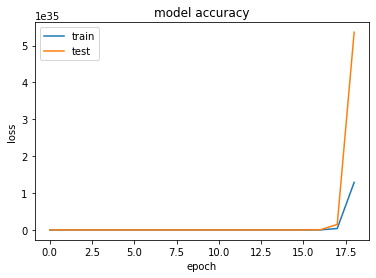

In [70]:
#visualization
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()